In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.externals import joblib

C:\Users\julio\Anaconda3\envs\julionn\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data = pd.read_csv("F:/data/dataset.csv")
data.drop(['protocol_type'], axis=1, inplace=True)
data.drop(['service'], axis=1, inplace=True)
data.drop(['flag'], axis=1, inplace=True)

In [3]:
print(sorted(Counter(data['class']).items()))

[('anomaly', 12833), ('normal', 9711)]


In [4]:
#Extraer anomaly
anomaly = data[data['class'] == 'anomaly'].sample(n=971, random_state=138)
data = data.drop(anomaly.index)
print(sorted(Counter(anomaly['class']).items()))

[('anomaly', 971)]


In [5]:
#Extraer normal
normal = data[data['class'] == 'normal'].sample(n=971*10, random_state=138)
data = data.drop(normal.index)
print(sorted(Counter(normal['class']).items()))

[('normal', 9710)]


In [6]:
#Combinar normal y anomaly
dataAll = normal.append(anomaly)
print(sorted(Counter(dataAll['class']).items()))

[('anomaly', 971), ('normal', 9710)]


In [7]:
#Estadísticas y herramientas
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve

from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassificationReport, ClassPredictionError
import scikitplot as skplt

#Importar los clasificadores
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier #objective= 'binary:logistic', nthread=4, seed=42

#Para la selección de parámetros
from sklearn.model_selection import GridSearchCV

#Otros
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [8]:
#Preparar los datos para el entrenamiento y validación
y = dataAll['class']
dataAll.drop(['class'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(dataAll, y, test_size=0.33, random_state=138, stratify=y)

In [9]:
#Crear los clasificadores
tree = DecisionTreeClassifier(criterion='gini') #Árbol simple
rf = RandomForestClassifier(random_state=138)
bgg = BaggingClassifier(DecisionTreeClassifier(random_state=138))
adb = AdaBoostClassifier(random_state=138)
ext = ExtraTreesClassifier(random_state=138)
xgb= XGBClassifier()

In [10]:
#Árbol de decisión simple
tree.fit(X_train, y_train)
prediction = tree.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

     anomaly       0.91      0.93      0.92       320
      normal       0.99      0.99      0.99      3205

    accuracy                           0.99      3525
   macro avg       0.95      0.96      0.96      3525
weighted avg       0.99      0.99      0.99      3525



In [11]:
prediction

array(['normal', 'normal', 'anomaly', ..., 'normal', 'normal', 'normal'],
      dtype=object)

In [12]:
#Random Forest tree
rf.fit(X_train, y_train)
prediction = rf.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

     anomaly       0.94      0.95      0.94       320
      normal       0.99      0.99      0.99      3205

    accuracy                           0.99      3525
   macro avg       0.97      0.97      0.97      3525
weighted avg       0.99      0.99      0.99      3525



In [13]:
#Bagging tree
bgg.fit(X_train, y_train)
prediction = bgg.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

     anomaly       0.92      0.96      0.94       320
      normal       1.00      0.99      0.99      3205

    accuracy                           0.99      3525
   macro avg       0.96      0.97      0.97      3525
weighted avg       0.99      0.99      0.99      3525



In [14]:
#Extreme tree 
ext.fit(X_train, y_train)
prediction = ext.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

     anomaly       0.95      0.93      0.94       320
      normal       0.99      1.00      0.99      3205

    accuracy                           0.99      3525
   macro avg       0.97      0.96      0.97      3525
weighted avg       0.99      0.99      0.99      3525



In [15]:
#Adaboost
adb.fit(X_train, y_train)
prediction = adb.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

     anomaly       0.92      0.80      0.85       320
      normal       0.98      0.99      0.99      3205

    accuracy                           0.98      3525
   macro avg       0.95      0.90      0.92      3525
weighted avg       0.97      0.98      0.97      3525



In [10]:
#XGBoost 
xgb.fit(X_train, y_train)
prediction = xgb.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

     anomaly       0.97      0.89      0.93       320
      normal       0.99      1.00      0.99      3205

    accuracy                           0.99      3525
   macro avg       0.98      0.95      0.96      3525
weighted avg       0.99      0.99      0.99      3525



In [17]:
#Análisis de curvas ROC y PRC

In [18]:
#Crear la lista de datasets
algoritmos = [['Tree',tree], ['RF',rf], ['Adb',adb], ['Ext',ext], ['Bagg',bgg], ['XGB',xgb]]

In [19]:
#Análisis PRC

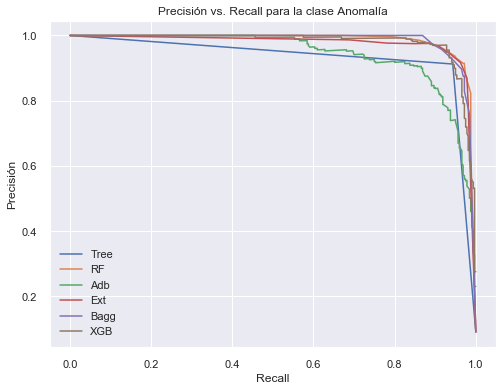

In [20]:
#Diccionarios para almacenar los resultados
precision = dict()
recall = dict()

#Abrir el gráfico para agregar los resultados
fig = plt.figure(figsize=(8,6))

#Recorrer la lista de algoritmos y evaluarlos de a uno
for i in range(len(algoritmos)):
    nombre, cls = algoritmos[i] 
    model = cls.fit(X_train, y_train) #Ajusto el algoritmo en los datos de entrenamiento
    y_pred_proba = model.predict_proba(X_test)[::,0] #Se predice la probabilidad
    precision[i], recall[i], _ = precision_recall_curve(y_test, y_pred_proba, pos_label='anomaly')    
    plt.plot(recall[i], precision[i], label=nombre) #lw=2,     

#Cerrar el gráfico
plt.xlabel("Recall")
plt.ylabel("Precisión")
plt.legend(loc="best")
plt.title("Precisión vs. Recall para la clase Anomalía")
plt.show()

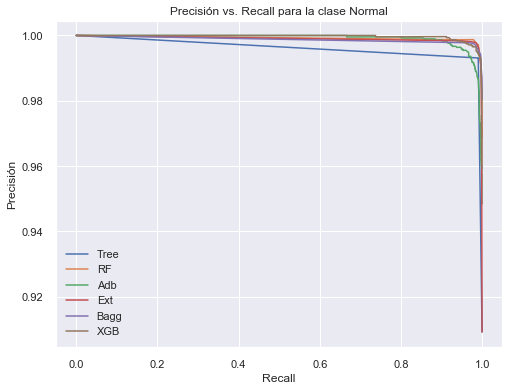

In [21]:
#Diccionarios para almacenar los resultados
precision = dict()
recall = dict()

#Abrir el gráfico para agregar los resultados
fig = plt.figure(figsize=(8,6))

#Recorrer la lista de algoritmos y evaluarlos de a uno
for i in range(len(algoritmos)):
    nombre, cls = algoritmos[i] 
    model = cls.fit(X_train, y_train) #Ajusto el algoritmo en los datos de entrenamiento
    y_pred_proba = model.predict_proba(X_test)[::,1] #Se predice la probabilidad
    precision[i], recall[i], _ = precision_recall_curve(y_test, y_pred_proba, pos_label='normal')    
    plt.plot(recall[i], precision[i], label=nombre) #lw=2,     

#Cerrar el gráfico
plt.xlabel("Recall")
plt.ylabel("Precisión")
plt.legend(loc="best")
plt.title("Precisión vs. Recall para la clase Normal")
plt.show()

In [22]:
#Análisis ROC

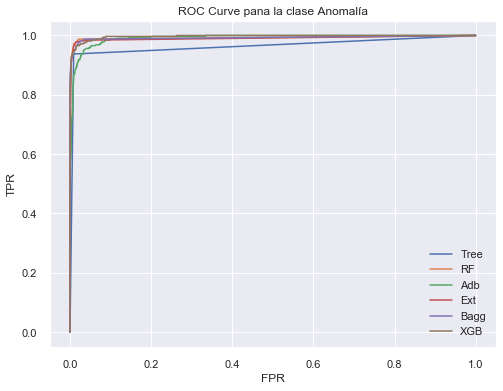

In [23]:
#Diccionarios para almacenar los resultados
fpr_rf = dict()
tpr_rf = dict()

#Abrir el gráfico para agregar los resultados
fig = plt.figure(figsize=(8,6))

for i in range(len(algoritmos)):
    nombre, cls = algoritmos[i]    
    model = cls.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[::,0]
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test, y_pred_proba, pos_label='anomaly')    
    plt.plot(fpr_rf[i], tpr_rf[i], label=nombre)
    
#Cerrar el gráfico
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="best")
plt.title("ROC Curve pana la clase Anomalía")
plt.show()

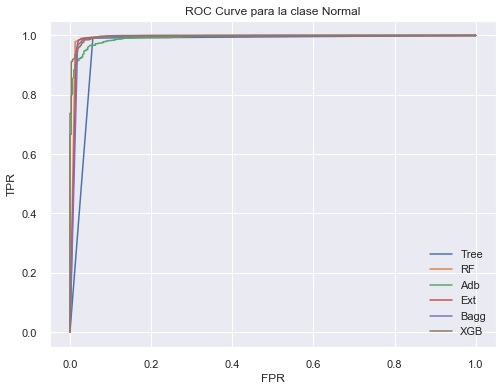

In [24]:
#Diccionarios para almacenar los resultados
fpr_rf = dict()
tpr_rf = dict()

#Abrir el gráfico para agregar los resultados
fig = plt.figure(figsize=(8,6))

for i in range(len(algoritmos)):
    nombre, cls = algoritmos[i]    
    model = cls.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test, y_pred_proba, pos_label='normal')    
    plt.plot(fpr_rf[i], tpr_rf[i], label=nombre)
    
#Cerrar el gráfico
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="best")
plt.title("ROC Curve para la clase Normal")
plt.show()

In [25]:
#Análisis particulares

In [26]:
#----Just ROC------------

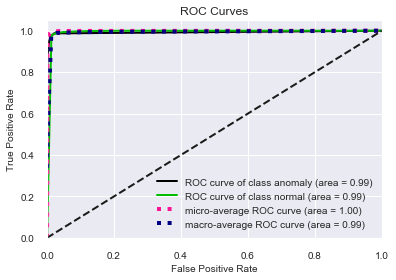

In [27]:
#XRandom Forest - ROC
rf_prob = rf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, rf_prob)
plt.show()

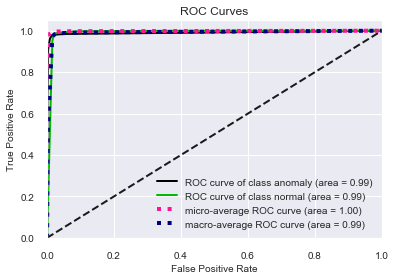

In [28]:
#Extreme Tree - ROC
ext_prob = ext.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, ext_prob)
plt.show()

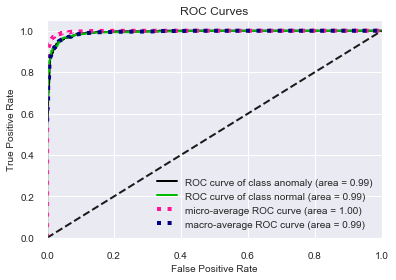

In [29]:
#AdaBoost - ROC
adb_prob = adb.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, adb_prob)
plt.show()

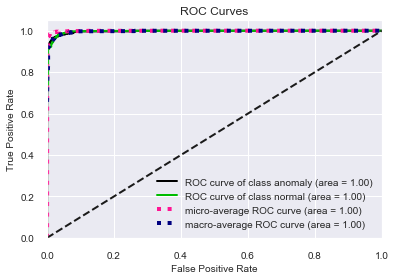

In [30]:
#XGBoost - ROC
xgb_prob = xgb.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, xgb_prob)
plt.show()

In [31]:
#----Just PRC------------

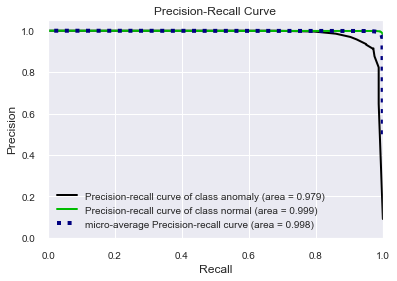

In [32]:
#Random Forest - PRC
rf_prob = rf.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, rf_prob)
plt.show()

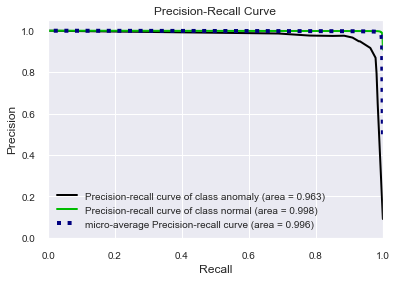

In [33]:
#Extreme Tree - PRC
ext_prob = ext.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, ext_prob)
plt.show()

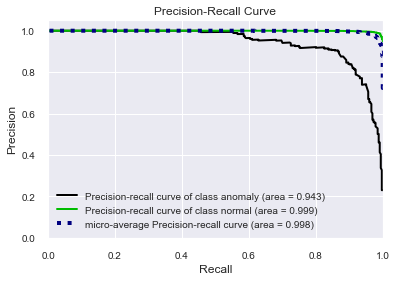

In [34]:
#AdaBoost - PRC
adb_prob = adb.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, adb_prob)
plt.show()

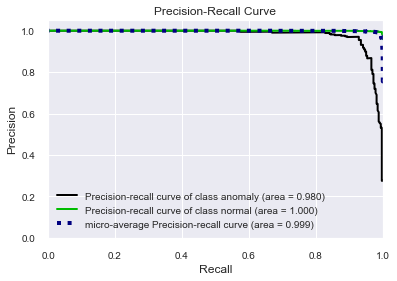

In [35]:
#XGBoost - PRC
xgb_prob = xgb.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, xgb_prob)
plt.show()

In [36]:
#Análisar el error de clasificación de RF, ET, Adb y XGB

In [27]:
#Análisis estadístico
from sklearn.metrics import precision_score, recall_score, f1_score

In [67]:
algoritmos = [['RF',rf], ['Adb',adb], ['Ext',ext], ['XGB',xgb]]

In [74]:
#Computar por item en X_test la precisión
df_preision = pd.DataFrame()

for _, alg in algoritmos:    
    cls = alg.fit(X_train, y_train)    
    items = len(X_test)   
    probability = [] #to store the predictions
    for i in range(items):    
        pred = cls.predict(X_test[i:i+1])
        precision = precision_score(y_test[i:i+1], pred, average='macro')
        probability.append(precision)
   
    df_preision[cls.__class__.__name__] = np.array(probability)

In [75]:
df_preision.to_csv("F:\\precision_statistics.csv")

In [77]:
#Computar por item en X_test la precisión
df_recall = pd.DataFrame()

for _, alg in algoritmos:    
    cls = alg.fit(X_train, y_train)    
    items = len(X_test)   
    probability = [] #to store the predictions
    for i in range(items):    
        pred = cls.predict(X_test[i:i+1])
        recall = recall_score(y_test[i:i+1], pred, average='macro')
        probability.append(recall)
   
    df_recall[cls.__class__.__name__] = np.array(probability)

In [78]:
df_recall.to_csv("F:\\recall_statistics.csv")

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from keras.layers import Dense, Dropout
from keras.models import Model, Sequential
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [12]:
X_train.shape

(7156, 38)

In [13]:
# Parámetros de la red neuronal:
shape = (38,)
output = 2
hidden_dims = 512
batch = 15

In [14]:
#Creo la red neuronal
model = Sequential()
model.add(Dense(hidden_dims, activation='sigmoid', input_shape=shape))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(output, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               19968     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 52,930
Trainable params: 52,930
Non-trainable params: 0
_________________________________________________________________


In [15]:
from keras.optimizers import SGD
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [17]:
#Para standarizar los datos de entrenamiento 
scaler = StandardScaler()

In [18]:
#Estandarizar los dos conjunto de datos X_Train y X_Test
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

In [19]:
y_train_dum = pd.get_dummies(y_train)
y_test_dum = pd.get_dummies(y_test)
y_train_dum.shape

(7156, 2)

In [20]:
y_train_dum=np.array(y_train_dum)
y_test_dum=np.array(y_test_dum)

In [21]:
epochs = 500
# if you're not using a GPU, you can set n_jobs to something other than 1
#grid = GridSearchCV(pipeline, cv=3, param_grid=param_grid)
model.fit(X_train_st, y_train_dum, batch_size=batch, epochs=epochs, validation_data=(X_test_st, y_test_dum))

Train on 7156 samples, validate on 3525 samples
Epoch 1/1
7156/7156 [==============================] - 1s 209us/step - loss: 0.2271 - accuracy: 0.9319 - val_loss: 0.1651 - val_accuracy: 0.9489


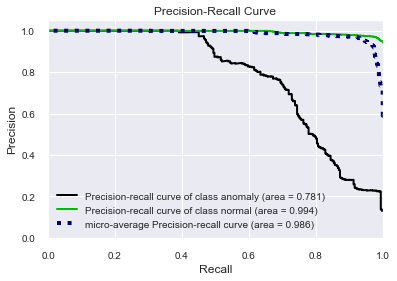

In [22]:
model_prob = model.predict_proba(X_test_st)
skplt.metrics.plot_precision_recall_curve(y_test, model_prob)
plt.show()

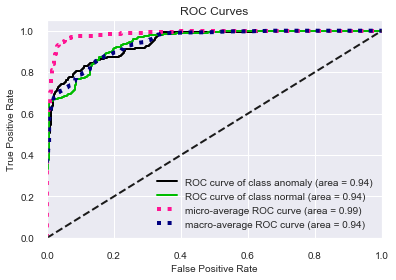

In [23]:
model_prob = model.predict_proba(X_test_st)
skplt.metrics.plot_roc_curve(y_test, model_prob)
plt.show()

In [24]:
def convert_prediction(pred):
    arr = []
    for i in range(len(pred)):
        if(pred[i] == 1):
            arr.append("normal")
        else:
            arr.append("anomaly")
    return np.array(arr)

In [25]:
prediction = model.predict_classes(X_test_st)
predict = convert_prediction(prediction)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

     anomaly       0.85      0.53      0.65       320
      normal       0.95      0.99      0.97      3205

    accuracy                           0.95      3525
   macro avg       0.90      0.76      0.81      3525
weighted avg       0.95      0.95      0.94      3525



In [ ]:
#Make the statistical test

In [29]:
#Computar por item en X_test la precisión
df_precision = pd.DataFrame()

#Compute XGBoost
items = len(X_test)   
probability = [] #to store the predictions
for i in range(items):    
    pred = xgb.predict(X_test[i:i+1])
    precision = precision_score(y_test[i:i+1], pred, average='macro')
    probability.append(precision)

df_precision["XGB"] = np.array(probability)

In [40]:
#Compute NN
items = len(X_test)   
probability = [] #to store the predictions
for i in range(items):    
    pred = model.predict_classes(X_test[i:i+1])
    pred_conv = convert_prediction(pred)
    precision = precision_score(y_test[i:i+1], pred_conv, average='macro')
    probability.append(precision)

df_precision["NN"] = np.array(probability)

In [41]:
from scipy import stats

In [42]:
st, p = stats.wilcoxon(df_precision['XGB'], df_precision['NN'])

In [43]:
print("p-value: " + str(p))

p-value: 4.6727225848652046e-39


In [44]:
if p < 0.05:
    print("Reject the null hipothesis, there is statistical differences")
else:
    print("Accept the null hipothesis, there is not statistical differences")

Reject the null hipothesis, there is statistical differences
